In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#predict the initialized record to classify the data as fraud or not
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [5]:
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
#Dividing the predicted and actual columns
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [7]:
#dividing the data into different the data frames accordingly
data_features = df[feature_names]
data_target = df[target]

In [8]:
#splitting the data into training and testing data as 70:30
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [9]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [10]:
#creating Logistic Regression Model and feeding the data to the model to train itself
model1 = LogisticRegression()
model1.fit(X_train, y_train.values.ravel())

C:\Users\bhava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
#generating and storing the predicted values
pred1 = model1.predict(X_test)

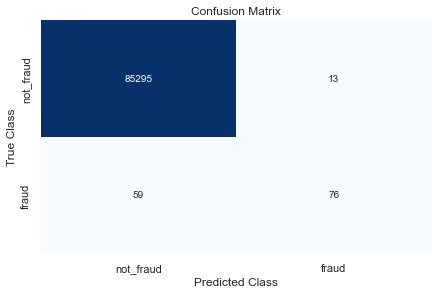

In [12]:
#plotting the confusion matrix to evaluate the models performance
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred1)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [13]:
#printing accuracy, F1 score and sensitivity/recall of the model
from sklearn.metrics import f1_score, recall_score , accuracy_score
f1_score = round(f1_score(y_test, pred1), 2)
recall_score = round(recall_score(y_test, pred1), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print("Accuracy Score for Logistic Regression Model 1 :"+ str(accuracy_score(y_test,pred1)))

Sensitivity/Recall for Logistic Regression Model 1 : 0.56
F1 Score for Logistic Regression Model 1 : 0.68
Accuracy Score for Logistic Regression Model 1 :0.9991573329588147


In [14]:
#creating Decision Tree Regressor Model and feeding the data to the model to train itself
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train, y_train.values.ravel())

DecisionTreeRegressor()

In [15]:
#generating and storing the predicted values
pred2 = model2.predict(X_test)

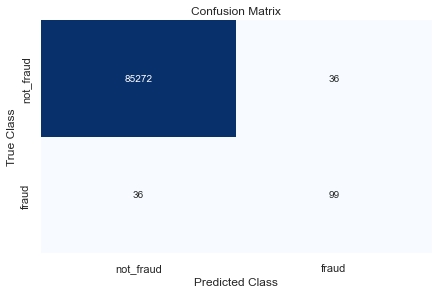

In [16]:
#plotting the confusion matrix to evaluate the models performance
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred2)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [17]:
#printing accuracy, F1 score and sensitivity/recall of the model
from sklearn.metrics import f1_score, recall_score , accuracy_score
f1_score = round(f1_score(y_test, pred2), 2)
recall_score = round(recall_score(y_test, pred2), 2)
print("Sensitivity/Recall for Decision Tree Regression Model 2 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Decision Tree Regression Model 2 : {f1_score}".format(f1_score = f1_score))
print("Accuracy Score for Decision Tree Regression Model 2 :"+ str(accuracy_score(y_test,pred2)))

Sensitivity/Recall for Decision Tree Regression Model 2 : 0.73
F1 Score for Decision Tree Regression Model 2 : 0.73
Accuracy Score for Decision Tree Regression Model 2 :0.9991573329588147


In [18]:
#ANN Model
# Libraries that we will need to create ANN
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# building our Neural Network
model3 = Sequential()
model3.add(Dense(40 , input_dim = 29 , activation = 'relu'))
model3.add(Dense(30 , input_dim = 40 , activation = 'relu'))
model3.add(Dense(20 , input_dim = 30 , activation = 'relu'))
model3.add(Dense(10 , input_dim = 20 , activation = 'relu'))
model3.add(Dense(6 , input_dim = 10 , activation = 'relu'))
model3.add(Dense(4 , input_dim = 6 , activation = 'relu'))
model3.add(Dense(1, input_dim = 4 , activation = 'sigmoid'))

In [20]:
# Specifying our loss and optimizer
model3.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [21]:
# Fitting our data to ANN
model3.fit( X_train , y_train , epochs = 200 , batch_size = 500 )

Epoch 1/200
399/399 [==============================] - 3s 5ms/step - loss: 0.0384 - accuracy: 0.9982
Epoch 2/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0062 - accuracy: 0.9982
Epoch 3/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.9982
Epoch 4/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0044 - accuracy: 0.9982
Epoch 5/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9982
Epoch 6/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9985
Epoch 7/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 8/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 9/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 10/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0034 - accura

399/399 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 82/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 83/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 84/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 85/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 86/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 87/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 88/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 89/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 90/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 

399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 161/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 162/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 163/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 164/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 165/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 166/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 167/200
399/399 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 168/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 169/200
399/399 [==============================] - 2s 4ms/step - loss: 0.0011 - a

In [22]:
# Getting the results
model3.evaluate(X_test,y_test)
pred3 = np.argmax(model3.predict(X_test), axis= -1)

2671/2671 [==============================] - 7s 2ms/step - loss: 0.0048 - accuracy: 0.9994


In [23]:
#printing accuracy, F1 score and sensitivity/recall of the model
from sklearn.metrics import f1_score, recall_score , accuracy_score
f1_score = round(f1_score(y_test, pred3), 2)
recall_score = round(recall_score(y_test, pred3), 2)
print("Sensitivity/Recall for ANN Model 3 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for ANN Model 3 : {f1_score}".format(f1_score = f1_score))
print("Accuracy Score for ANN Model 3 :"+ str(accuracy_score(y_test,pred3)))

Sensitivity/Recall for ANN Model 3 : 0.0
F1 Score for ANN Model 3 : 0.0
Accuracy Score for ANN Model 3 :0.9984199992977775


In [24]:
#Gradient Boosting Model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
#creating Gradient Boosting Model and feeding the data to the model to train and test itself
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=1, random_state=0, verbose = 1)
model4.fit(X_train, y_train)

C:\Users\bhava\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


      Iter       Train Loss   Remaining Time 
         1           0.3231           22.68m
         2        1111.4913           22.50m
         3        1111.4398           22.23m
         4        1111.4398           22.13m
         5        1111.4398           22.06m
         6        1111.4398           21.99m
         7        1111.4398           21.91m
         8        1111.4398           21.78m
         9        1111.4398           21.66m
        10        1111.4398           21.55m
        20        1111.4398           20.47m
        30        1111.4398           19.33m
        40        1111.4398           18.20m
        50        1111.4398           17.07m
        60        1111.4398           15.93m
        70        1111.4398           14.79m
        80        1111.4398           13.65m
        90        1111.4398           12.55m
       100        1111.4398           11.40m
       200        1111.4398            0.00s


GradientBoostingClassifier(learning_rate=1, n_estimators=200, random_state=0,
                           verbose=1)

In [29]:
#generating and storing the predicted values
pred4 = model4.predict(X_test)

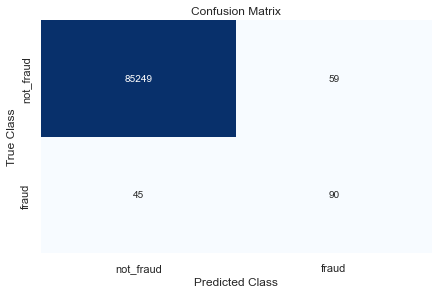

In [30]:
#plotting the confusion matrix to evaluate the models performance
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred4)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [31]:
#printing accuracy, F1 score and sensitivity/recall of the model
from sklearn.metrics import f1_score, recall_score , accuracy_score
f1_score = round(f1_score(y_test, pred4), 2)
recall_score = round(recall_score(y_test, pred4), 2)
print("Sensitivity/Recall for Gradient Boosting  Model 4 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Gradient Boosting  Model 4 : {f1_score}".format(f1_score = f1_score))
print("Accuracy Score for Gradient Boosting  Model 4 :"+ str(accuracy_score(y_test,pred4)))

Sensitivity/Recall for Gradient Boosting  Model 4 : 0.67
F1 Score for Gradient Boosting  Model 4 : 0.63
Accuracy Score for Gradient Boosting  Model 4 :0.9987828142738434
